In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
iris_data = pd.read_csv('../files/Week02_iris_w_missing.csv')

In [4]:
dropped_iris_data = iris_data.dropna(axis = 0)
X = dropped_iris_data.drop(columns = 'target')
y = dropped_iris_data['target']

In [5]:
target_dict = {}

for i, v in enumerate(iris_data.target.unique()):
    target_dict[i] = v
target_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [6]:
label_encoded_species = pd.Series([None for i in range(iris_data.shape[0])])

for i in range(len(target_dict)):
    label_encoded_species[iris_data['target'] == target_dict[i]] = i
print(iris_data['target'][0], label_encoded_species[0])
print(iris_data['target'][50], label_encoded_species[50])
print(iris_data['target'][100], label_encoded_species[100])


setosa 0
versicolor 1
virginica 2


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoded_series_sklearn = LabelEncoder().fit_transform(iris_data[['target']])
label_encoded_series_sklearn

C:\Users\keb20\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
## 데이터 전처리 과정 생략?
from sklearn.naive_bayes import GaussianNB as GNB

results = []

model = GNB()
model.fit(X, y)
result_basic = model.predict(X)

results.append(result_basic);
pd.DataFrame(result_basic).value_counts()

setosa        42
virginica     41
versicolor    39
dtype: int64

In [15]:
model_0 = GNB(priors = [.98, .01, .01])
model_0.fit(X, y)
result_0 = model_0.predict(X)

results.append(result_0)
pd.DataFrame(result_0).value_counts()

setosa        42
virginica     41
versicolor    39
dtype: int64

In [16]:
model_1 = GNB(priors = [.01, .98, .01])
model_1.fit(X, y)
result_1 = model_1.predict(X)

results.append(result_1)
pd.DataFrame(result_1).value_counts()

versicolor    48
setosa        42
virginica     32
dtype: int64

In [17]:
model_2 = GNB(priors = [.01, .01, .98])
model_2.fit(X, y)
result_2 = model_2.predict(X)

results.append(result_2)
pd.DataFrame(result_2).value_counts()

virginica     54
setosa        42
versicolor    26
dtype: int64

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

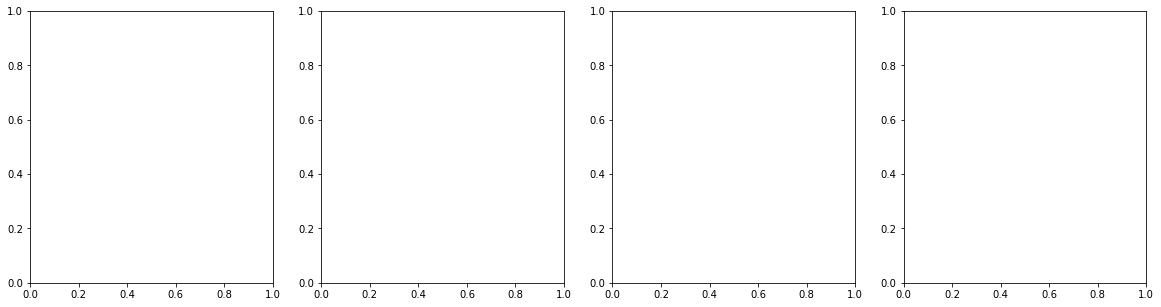

In [26]:
fig, axes = plt.subplots(1, 4, figsize = (20, 5))
for i in range(4):
    axes[i].scatter(dropped_iris_data['sepal width (cm)'], dropped_iris_data.columns['sepal length (cm)'], c = results[i], marker = 'o', cmap = 'Paired')